# 퍼셉트론 기반 학습


**ANN**(단층 신경망)을 이용한 필기체 문자 분류


### 1. 패키지 불러오기
(keras 패키지 사용)


In [ ]:
from keras import layers #각 계층을 만드는 모듈
from keras import models # 각 계층을 연결해 '신경망 모델'을 만든 후, 컴파일-학습시키는 모듈
                         # compile(), fit(), predict(), evaluate() 등 여러 딥러닝 처리 함수를 제공

### 2. 필요한 파라미터 설정
후반의 main()에서 설정   
* Nin: 입력계층 노드 수
* Nh: 은닉 계층 수
* number_of_class: 출력값이 가질 클래스 수
* Nout: 출력 노드 수

### 3. 모델 구현
신경망을 연쇄 방식 모델링을 포함하는 함수형 구현

#### **모델 구현 방식**
- **분산** 방식 모델링을 포함하는 ***함수형***구현
- **연쇄** 방식 모델링을 포함하는 ***함수형***  구현

- **분산** 방식 모델링을 포함하는 ***객체지향형*** 구현
- **연쇄** 방식 모델링을 포함하는 ***객체지향형*** 구현

In [ ]:
def ANN_seq_func(Nin, Nh, Nout):
  model = models.Sequential()
  model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,))) #레이어 1 추가 (relu 함수)
  model.add(layers.Dense(Nout, activation='softmax')) #softmax 함수로 레이어 2 추가
  
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

### 4. 데이터 불러오기
Mnist 필기 숫자 데이터셋

In [ ]:
import numpy as np
from keras import datasets  #mnist 호출
from keras.utils import np_utils  #to_categorical

def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
  # 0~9의 숫자로 된 출력값을 이진수(0/1)로 표현되는 벡터로 바꾼다
  Y_train = np_utils.to_categorical(y_train)
  Y_test = np_utils.to_categorical(y_test)

  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W*H) #행렬의 행을 자동으로 설정, 열수가 W+H로 지정
  X_test = X_test.reshape(-1, W*H)

# 정규화: 0-255로 되어있는 입력값을 0-1로 바꿔줌 (성능 최적화를 위해)
  X_train = X_train/255.0 
  X_test = X_test/255.0

  return (X_train, Y_train), (X_test,Y_test)

### 5. 학습 결과 분석을 위한 그래프 구현
텐서, 파이토치, 케라스 모두 쓸 수 있는 코드임

In [ ]:
import matplotlib.pyplot as plt

def plot_Accuracy(history, title=None):
  if not isinstance(history, dict):
    history = history.history
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  if title is not None:
    plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Verification'], loc=0)

def plot_Loss(history, title=None):
  if not isinstance(history, dict):
    history = history.history
  plt.plot(history['loss'])      #학습 데이터로 구한 손실값
  plt.plot(history['val_loss'])  #검증 데이터로 구한 손실값
  if title is not None:
    plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Verification'], loc=0)


### 6. 학습 및 성능 분석 (main 함수)
#### (1) 파라미터 설정
* Nin: 입력계층 노드 수
* Nh: 은닉 계층 수
* number_of_class: 출력값이 가질 클래스 수
* Nout: 출력 노드 수   
##### ※**참고**
 **Epoch**란 Train 데이터셋에 포함되어 있는 모든 데이터값들이 각각 한번씩 예측 모델에 들어온 뒤 weight 값을 갱신하는 주기를 의미함

#### (2) 모델 설정   
#### (3) 학습하기   
#### (4) main() 코드 실행

In [ ]:
def main():
  ### 1. 파라미터 설정 ###
  Nin = 784  #입력계층 노드 수
  Nh=1  #100  #은닉 계층 수
  number_of_class = 10  # 출력값이 가질 클래스 수
  Nout = number_of_class  #출력 노드 수

  ### 2. 모델 설정 ###
  model = ANN_seq_func(Nin, Nh, Nout)
  (X_train, Y_train), (X_test, Y_test) = Data_func()

  ### 3. 학습하기 ###
  history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2) #이 한 줄로 모델 학습 끝
  performance_test = model.evaluate(X_test, Y_test, batch_size=100)
  print('Test Loss and Accuracy -->', performance_test)

  plot_Loss(history)
  plt.show()
  plot_Accuracy(history)
  plt.show()


Epoch 1/15
480/480 [==============================] - 2s 2ms/step - loss: 2.1739 - accuracy: 0.1743 - val_loss: 1.9910 - val_accuracy: 0.1984
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 1.9655 - accuracy: 0.2061 - val_loss: 1.9044 - val_accuracy: 0.2122
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 1.8909 - accuracy: 0.2249 - val_loss: 1.8618 - val_accuracy: 0.2433
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 1.8494 - accuracy: 0.2485 - val_loss: 1.8298 - val_accuracy: 0.2612
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 1.8201 - accuracy: 0.2545 - val_loss: 1.8009 - val_accuracy: 0.2711
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 1.7993 - accuracy: 0.2725 - val_loss: 1.7737 - val_accuracy: 0.2800
Epoch 7/15
480/480 [==============================] - 1s 2ms/step - loss: 1.7705 - accuracy: 0.2876 - val_loss: 1.7510 - val_accuracy: 0.2968
Epoch 

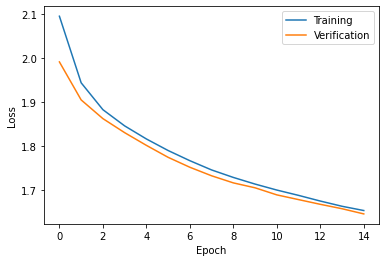

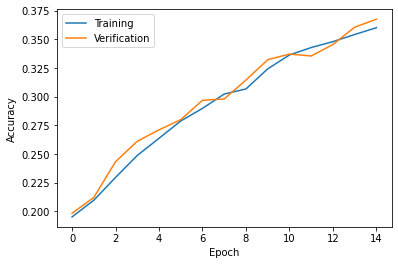

In [ ]:

### 4. main 코드 실행하기 ###
if __name__ == '__main__':
  main()

# 은닉 계층 수(**Nh**)에 따른 정확도 변화
Epoch가 커질 수록 Loss는 작아지고(그래프 1)   
Accuracy는 커진다(그래프 2)

### Nh=2 로 늘리면?
Loss 수치는 더 낮아지고   
Accuracy는 더 커지는 효과